Here, we will be using the concept of Reinforcement Learning. We know that Supervised Learning in which we have the labelled dataset and unsupervised learning which has the unlabelled dataset. Reinforcement Learning is very similar to the way we teach children or pets by giving a positive remark whenever they do something good or obey us properly and we give a negative remark or scold them whenever they do something good.
for this, we have two methods:
1. Upper Confidence Bound
2. Thompson Sampling

We know about the problem of Multi-armed Bandit, in which we have some machines in which we put the money and all the machines have some algorithm running in them, and based on the amount of money which we put in them, we get some outcome, for example, a part of money or some chocolates, etc. in which case we win. In this, our goal is maximize the return. Each machine has its own distribution set. Now, initially we will go to each and every machine and we try it out and if we get a high-return, then we send more on that machine.
The application of this problem is in the advertisement industry in which we have different ads and we want to which ad has more impact on the user. we can do this on a trial basis and if the user clicks on the ad, then it means that the person is getting impacted by the ad and that ad will give more significance of the product.
Suppose we have D arms and, for example, arms are the ads that we display to the user, when they connect to a webpage. Now, each time a user connects to a web page, it makes a Round. At each Round 'n', we choose an ad to display to the user. For each Round n, the ad 'i' gives the reward ri(n)={0,1} (If the user clicks on the ad, then we give it a '1' else we give it a '0'). Our goal is to maximize the total reward.

**Difference between UCB and Thompson Sampling**
<table>
    <thead>
        <tr>
            <td><b>UCB</b></td>
            <td><b>Thompson Sampling</b></td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>It is the Deterministic Approach.</td>
            <td>It is the Probabilistic Approach.</td>
        </tr>
        <tr>
            <td>It required Updation in each round.</td>
            <td>It can have a delayed feedback.</td>
        </tr>
        <tr>
            <td>We do not have a better empirical evidence for this.</td>
            <td>We have a better empirical evidence for this.</td>
        </tr>
    </tbody>
</table>

# Method 1 - Using Upper Confidence Bound

In Upper Confidence Bound, we can have distribution for different machines and we will try to find the most optimum one out of those. We try to find the best one based on the gaps between the distributions. We do not want the graph to skewed in one direction because that would mean less response.

**Alogrithm:**
**Step 1:** At each round 'n', we consider two numbers for each ad 'i'. So, in this, we have:

        Ni(n): Number of times the Ad 'i' was selected upto Round 'n'
        Ri(n): Sum of Rewards of the Ad 'i' upto Round 'n'
        
**Step 2:** From the above computer numbers, we calculate the average reward of Ad 'i' upto the Round 'n'. So, the formula which we have is:
<center>
$\bar{r}i(n) = Ri(n)/Ni(n)$
</center>
Further, we calculate the confidence interval as:

[$\bar{r}i(n) - deltai(n), \bar{r}i(n) + deltai(n)$], where $deltai(n)$ can be calculated as:
<center>
$deltai(n) = \sqrt{ \frac{3}{2} * \frac{log(n)}{Ni(n)} }$
</center>

**Step 3:** Select the Ad 'i' which has the maximum UCB which is given by r'i(n) + deltai(n).

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Importing Dataset
A Company had conducted a survey and collected data for different ads which were created and check for the response of the user. In the dataset, '1' represents that the user clicked on the ad whereas '0' represents that the user did not click on the ad. The best ad is not known initially but we try to find that with the help of the model because no one knows which ads might be loved by the users.

In [2]:
dataset = pd.read_csv("C:\\Users\\aashi\\anaconda3\\Jupyter Notebooks\\1stop.ai\\Best Ads Predictor\\Ads_CTR_Optimisation.csv")

In [3]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [4]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Implementing UCB

In [5]:
N = 10000 # No. of rows
d = 10 # No. of ads
ads_selected = [] # list of selected ads

In [6]:
# list of selected elements
number_of_selections = [0]*d

In [7]:
# sum of Rewards
sum_of_rewards = [0]*d
total_reward = 0

In [8]:
for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if(number_of_selections[i]>0):
            average_reward = sum_of_rewards[i]/number_of_selections[i]
            delta_i = math.sqrt(3/2*math.log(n+1)/number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if(upper_bound>max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
        ads_selected.append(ad)
        number_of_selections[ad] += 1
        reward = dataset.values[n,ad]
        sum_of_rewards[ad] += reward

## Visualising the Results

Text(0, 0.5, 'No. of times each Ad was selected')

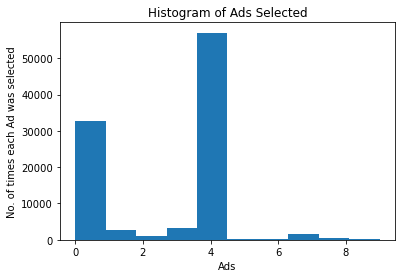

In [9]:
plt.hist(ads_selected)
plt.title("Histogram of Ads Selected")
plt.xlabel("Ads")
plt.ylabel("No. of times each Ad was selected")

# Method 2 - Using Thompson Sampling

Here, we will be using the Bayesian Inference. In this, the Ad 'i' gets it's reward 'y' from the Bernoulli Distribution as:
$p(y|\theta{i}) ~ B(\theta{i})$

Now, $\theta{i}$ is unkown initially but we sets uncertainity by assuming that it has a uniform distribution $p(\theta{i}) ~ U([0,1])$ which is the Priori Distribution and then we will apply the Base Rule. In Base Rule, we have the distribution as:
<center>
$p(y|\theta{i}) = \frac{p(y|\theta{i})p(\theta{i})}{\int\phi(y|\theta{i})p(\theta{i})\,d\theta{i}}$
</center>
We get the value of $p(y|\theta{i})$ given by [No. of successes + 1, No. of failures + 1]. For each Round, we will get the random $\theta{i}$ from the distribution for each Ad 'i'. And, at each round, we will select the Ad, which has the highest value of $\theta{i}$.

## Importing Libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import random

## Import Dataset

In [11]:
dataset = pd.read_csv("C:\\Users\\aashi\\anaconda3\\Jupyter Notebooks\\1stop.ai\\Best Ads Predictor\\Ads_CTR_Optimisation.csv")

In [12]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [13]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Implementation of Thompson Sampling

In [14]:
N = 10000 # No. of rows
d = 10 # No. of Ads

In [15]:
ads_selected = []
number_of_rewords_1 = [0] * 10
number_of_rewords_0 = [0] * 10
total_reward = 0

In [16]:
for n in range(0,N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(number_of_rewords_1[i] + 1, number_of_rewords_0[i] + 1)
        if(random_beta > max_random):
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if(reward == 1):
        number_of_rewords_1[ad] += 1
    else:
        number_of_rewords_0[ad] += 1
    total_reward += reward

## Visualising the Result

Text(0, 0.5, 'No. of times the Ad was selected')

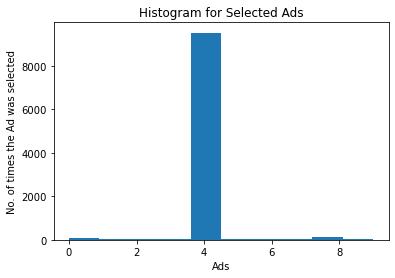

In [17]:
plt.hist(ads_selected)
plt.title("Histogram for Selected Ads")
plt.xlabel("Ads")
plt.ylabel("No. of times the Ad was selected")